In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import random 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [2]:
df= pd.read_csv("customer_experience_data.csv")
df.head(5)

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [4]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


In [5]:
df1 = df.drop(["Customer_ID","Gender","Location","Retention_Status"],axis=1)

In [6]:
df1.head(5)

,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,56,11,4,18,38,18.319606,7,1,2,1
1,69,10,3,2,17,9.015198,6,1,1,1
2,46,5,5,11,46,45.921572,10,1,2,0
3,32,5,1,6,13,44.105053,5,0,1,0
4,60,14,5,8,46,17.897471,1,1,2,1


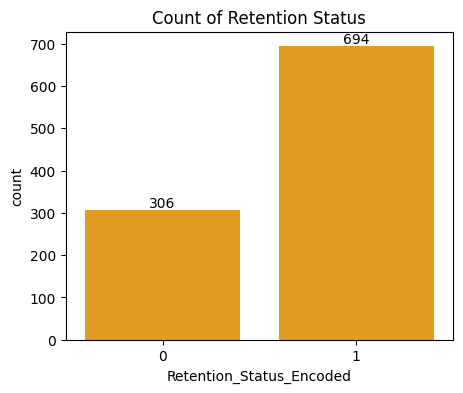

In [7]:
##### Checking Retention Status
ret_st_enc =df1["Retention_Status_Encoded"].value_counts()
plt.figure(figsize=(5,4))
ax= sns.barplot(ret_st_enc,color="Orange")
plt.title("Count of Retention Status")
ax.bar_label(ax.containers[0])
plt.show()
##Shows imbalanced data

In [8]:
col =df1.columns[0:9]
col

Index(['Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased',
       'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score',
       'Gender_Encoded', 'Location_Encoded'],
      dtype='object')

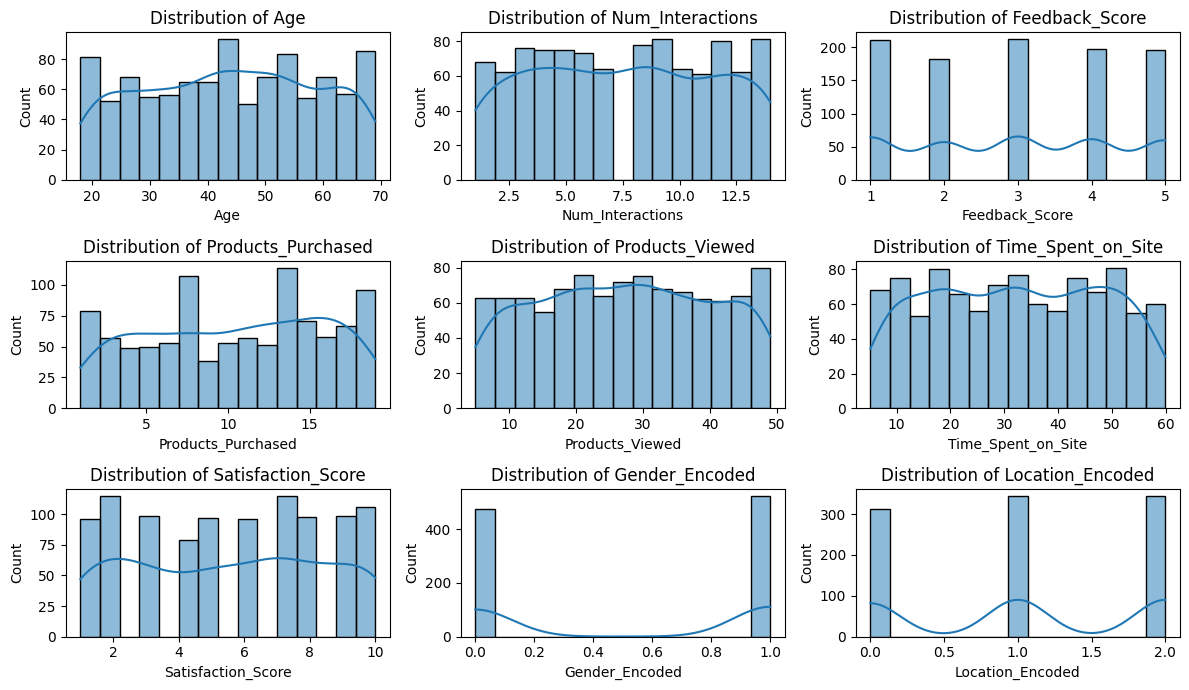

In [9]:
plt.figure(figsize=(12, 7))
for i, col in enumerate(col, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[col], bins=15, kde=True)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

In [10]:
#In the above plot , 
##the age group between 45 and 50 are slightly more engaged persons.
##the feedbacks are evely distributed.
#most people prefers to purchase 6 or 11 or 24 items.
#Most users explored(viewed) 20–35 items.
#most satisfaction score fall under 2,7 and 10.
##Time spent on website are around 5-60 mins

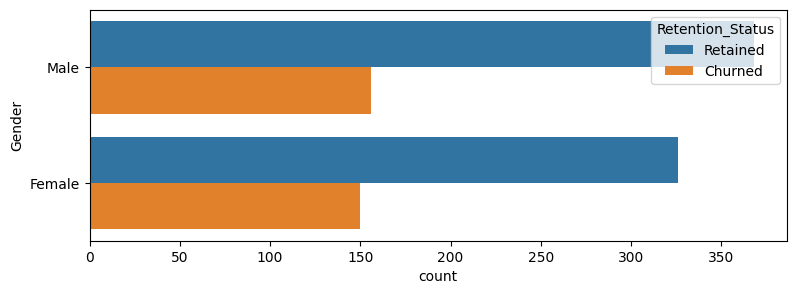

In [11]:
###retention with gender
plt.figure(figsize=(9,3))
sns.countplot(y="Gender", hue="Retention_Status", data=df)
plt.show()

#### in the above chart more males are retained when compared to females. But churn rates are very close.

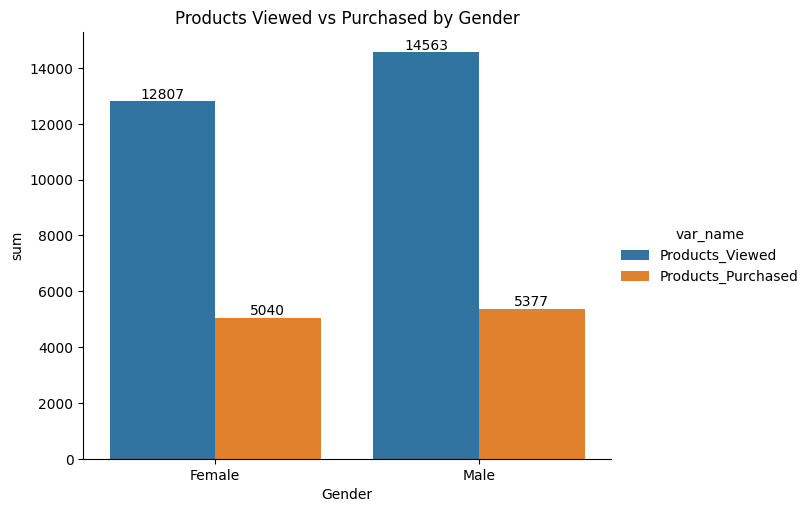

In [12]:
###Products viewed and purchased by Gender
prod_view_pur = pd.DataFrame(df[["Gender","Products_Viewed","Products_Purchased"]].groupby("Gender").sum().reset_index())
prod_view_pur1=prod_view_pur.melt("Gender",var_name="var_name", value_name="sum")
gen =sns.catplot(x="Gender",y="sum",hue="var_name",kind="bar",data=prod_view_pur1,height=5,aspect=1.3)
for ax in gen.axes.flat:
    for c in ax.containers:
        ax.bar_label(c)
plt.title("Products Viewed vs Purchased by Gender")
plt.show()


#### Males are viewed the website more than Females but purchased difference is relatively small.
#### this means,males were browse more and conversion rates (views to purchases) maybe higher or comparable among female customers in future.

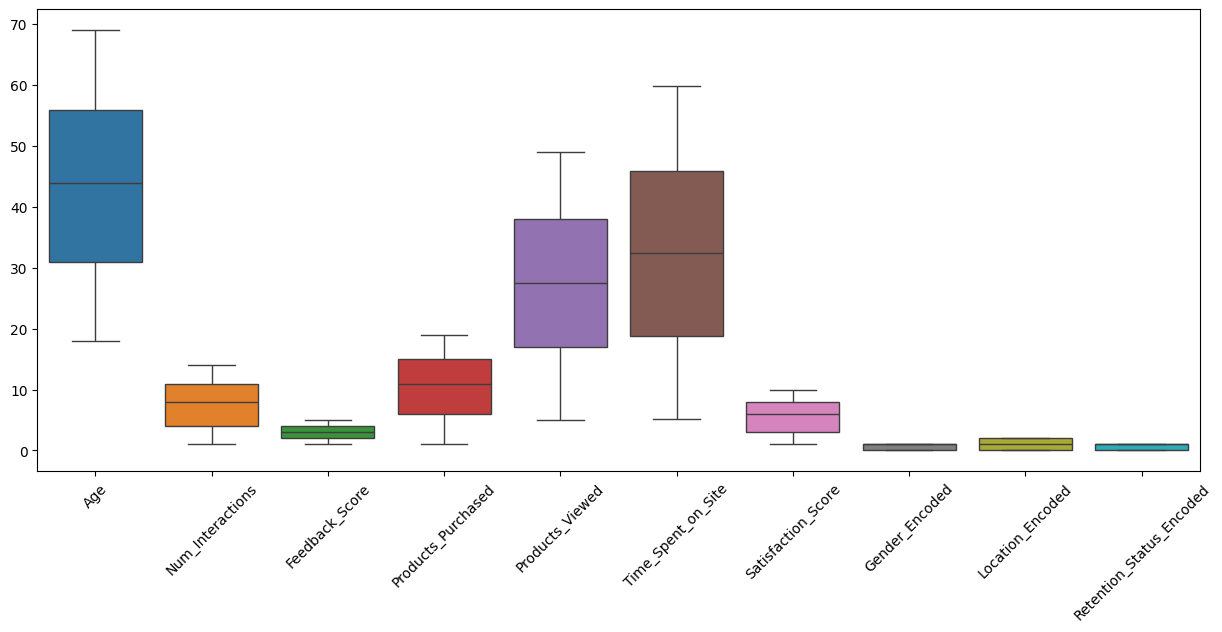

In [13]:
#####Boxplot for variables
plt.figure(figsize=(15,6))
sns.boxplot(df1)
plt.xticks(rotation=45)
plt.show()

In [14]:
df1["conversion_rate"] = df1["Products_Purchased"]/df1["Products_Viewed"]
df1["avg_time_per_view"] = df1["Time_Spent_on_Site"]/df1["Products_Viewed"]
df1['interact_score'] = df1['Satisfaction_Score'] * df['Feedback_Score']
df1['effort'] = df1['Num_Interactions'] / (df1['Time_Spent_on_Site'])

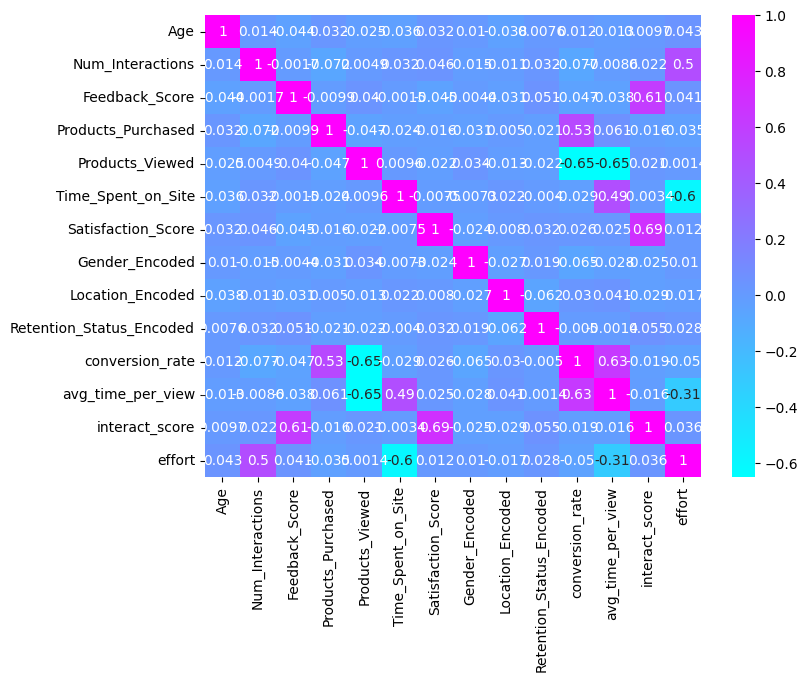

In [15]:
####Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap="cool")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
x= df1.drop("Retention_Status_Encoded",axis=1)
y = df1["Retention_Status_Encoded"]
sc =StandardScaler()
x1 =sc.fit_transform(x)

In [17]:
####split the train test 
x_train,x_test,y_train,y_test =train_test_split(x1,y,stratify=y,test_size=0.2,random_state=42)
# Apply SMOTE for imbalanced data
smote = SMOTE(random_state=42)
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

In [19]:
###Logistic Regresssion
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train1,y_train1)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.32      0.48      0.38        61
           1       0.71      0.55      0.62       139

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.59      0.53      0.55       200



In [23]:
rf_tree =RandomForestClassifier(class_weight='balanced', random_state=42)
rf_tree.fit(x_train1,y_train1)
pred1 = rf_tree.predict(x_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.38      0.33      0.35        61
           1       0.72      0.76      0.74       139

    accuracy                           0.63       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.62      0.63      0.62       200



In [24]:
from xgboost import XGBClassifier
param= {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth':8, 'n_estimators': 800, 'scale_pos_weight': 2, 'subsample': 0.8}
xgb = XGBClassifier(**param,objective='binary:logistic',random_state=101)
xgb.fit(x_train1,y_train1)
pred2 = xgb.predict(x_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.33      0.23      0.27        61
           1       0.70      0.79      0.74       139

    accuracy                           0.62       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.59      0.62      0.60       200



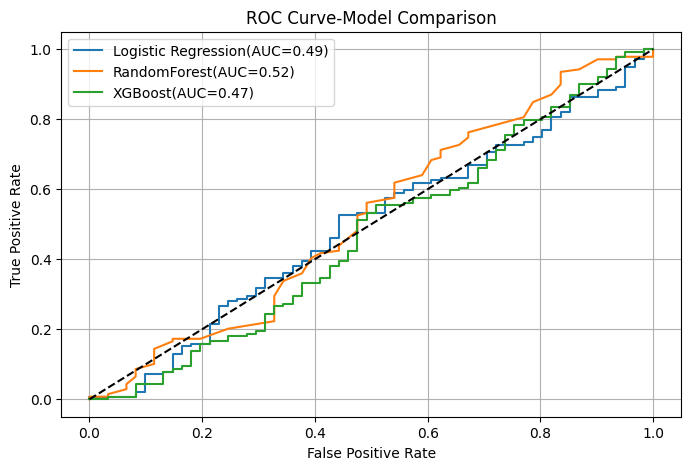

In [25]:
#############Predict probabilities
lr_prob = lr.predict_proba(x_test)[:,1]
rf_tree_prob = rf_tree.predict_proba(x_test)[:,1]
xgb_prob = xgb.predict_proba(x_test)[:,1]

#########ROC curve and AUC
fpr_lr ,tpr_lr,_ = roc_curve(y_test,lr_prob)
auc_lr = roc_auc_score(y_test,lr_prob)

fpr_rf ,tpr_rf,_= roc_curve(y_test,rf_tree_prob)
auc_rf = roc_auc_score(y_test,rf_tree_prob)

fpr_xgb, tpr_xgb,_ = roc_curve(y_test,xgb_prob)
auc_xgb = roc_auc_score(y_test,xgb_prob)


# Plot the score
plt.figure(figsize=(8, 5))
plt.plot(fpr_lr,tpr_lr,label =f'Logistic Regression(AUC={auc_lr:.2f})')
plt.plot(fpr_rf,tpr_rf,label =f'RandomForest(AUC={auc_rf:.2f})')
plt.plot(fpr_xgb,tpr_xgb,label =f'XGBoost(AUC={auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Model Comparison')
plt.legend()
plt.grid()
plt.show()

In [28]:
print(confusion_matrix(y_test,pred1))  #confusion matrix of RF

[[ 20  41]
 [ 33 106]]


*** Summary ***
#### Conducted end-to-end customer retention analysis on a Kaggle dataset (1,000 records).
#### Performed EDA, feature engineering, and built multiple classification models (Logistic Regression,Random Forest,XGBClassifier). 
#### Achieved a classification accuracy of 63% and an AUC score of 52% for churn prediction using Random Forest.
